### 제1절. 단순 선형 회귀

#### 2. 정규방정식

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')

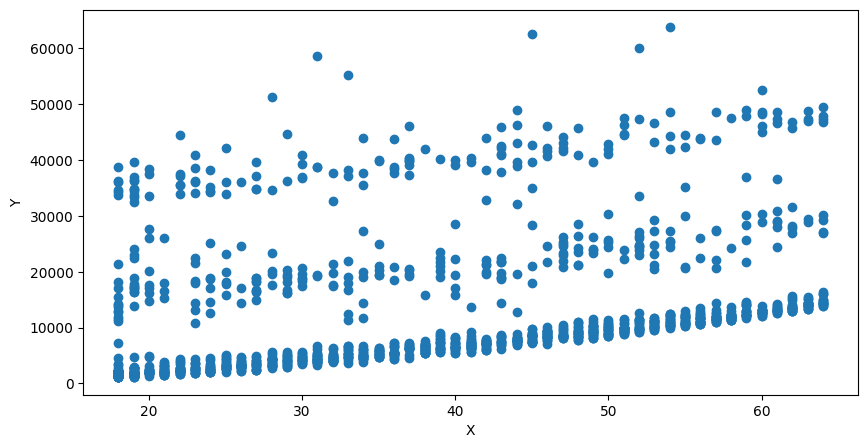

In [2]:
x = data['age']
y = data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
print(x.shape, y.shape)
x = np.array(x)
y = np.array(y)
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

(1338,) (1338,)


In [4]:
lr = LinearRegression()
lr.fit(x, y)
print("절편", lr.intercept_, "계수", lr.coef_)
print(lr.score(x, y))  # 결정계수

절편 [3165.88500606] 계수 [[257.72261867]]
0.08940589967885804


In [5]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]
[[ 8062.61476073]
 [19660.13260074]]


#### 3. 경사하강법
- 최적화알고리즘

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor

data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')
x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [8]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=200)
sgd_reg.fit(x, y.ravel())  # y.ravel : 다차원 -> 1차원으로 바꿔주는 함수, flatten과 비슷함

SGDRegressor(random_state=200)

In [9]:
print("절편", sgd_reg.intercept_, "계수", sgd_reg.coef_)

절편 [-507.07230083] 계수 [772.38069104]


In [10]:
# 새로운 값 예측
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[14168.16082885 48925.29192548]


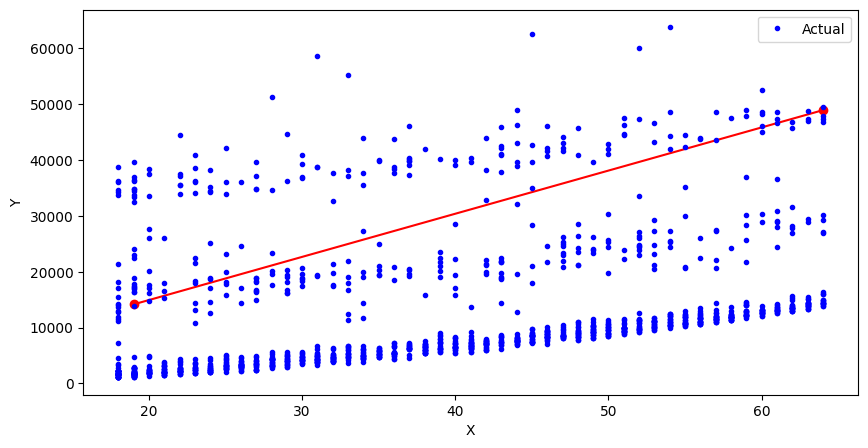

In [17]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, 'ro-')
plt.plot(x, y, "b.", label="Actual")
plt.legend(loc="upper right")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 제2절. 다항회귀

In [18]:
import pandas as pd
cereal = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv")
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [19]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]  # 설탕이 함유된 데이터에 대해서만 분석 
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [21]:
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)

C:\Users\thdus\AppData\Local\Temp\ipykernel_2428\3676420722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


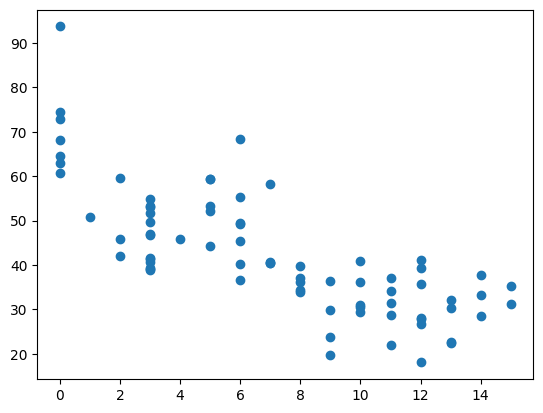

In [24]:
cereal2.reset_index(drop=True, inplace=True)
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x, y)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [29]:
X_train.reshape(-1, 1).shape

(53, 1)

In [30]:
X_train

array([11,  6, 10,  6, 12,  7,  3, 13,  0, 11,  9, 12,  8,  4,  2,  3,  0,
       13,  9,  1, 14, 10,  3,  3,  6,  6,  9,  8, 10,  3,  0, 12,  3,  5,
        5,  8,  3, 13,  3, 15, 12,  3, 10,  5,  0,  0,  3, 12,  0,  2, 14,
        3,  7], dtype=int64)

In [31]:
X_train.shape

(53,)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
# X_train을 polynomial 의 값으로 변환
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))  # 절편까지 포함

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)


LinearRegression()

In [41]:
# X_test도  polynomial 값으로 변환
X_test_poly = poly_reg.transform(X_test.reshape(-1, 1))
pred = reg.predict(X_test_poly)

np.set_printoptions(precision=2)
np.concatenate((pred.reshape(len(pred), 1), 
                y_test.reshape(len(y_test), 1)),
                1)


array([[51.63, 46.66],
       [32.1 , 28.74],
       [55.79, 59.64],
       [31.08, 37.84],
       [32.1 , 31.44],
       [44.46, 44.33],
       [38.82, 40.4 ],
       [41.45, 55.33],
       [41.45, 49.12],
       [31.38, 27.75],
       [36.56, 34.38],
       [34.7 , 29.92],
       [65.25, 63.01],
       [33.21, 31.07],
       [44.46, 52.08],
       [38.82, 40.45],
       [51.63, 53.13],
       [36.56, 33.98],
       [41.45, 49.51],
       [31.04, 22.74],
       [31.38, 39.26],
       [31.5 , 31.23],
       [32.1 , 21.87]])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1, 1)), y_test)

print("MAE\t{}".format(round(mae, 3)))
print("RMSE\t{}".format(round(rmse, 3)))
print("R2\t{}".format(round(acc*100, 3)))

MAE	4.606
RMSE	5.794
R2	74.376


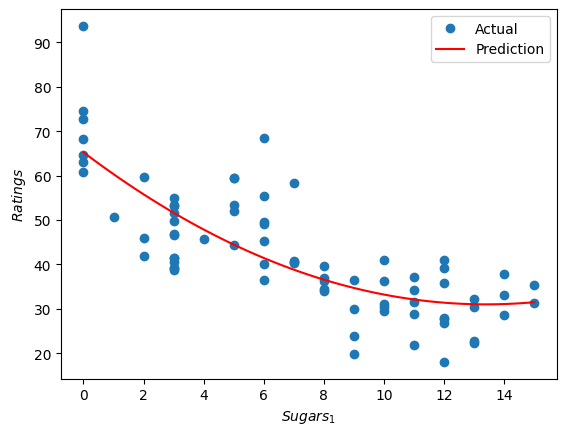

In [47]:
X_new = np.linspace(0, 15, 100).reshape(100, 1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x, y, 'o', label="Actual")
plt.plot(X_new, y_new, 'r-', label='Prediction')
plt.legend(loc="upper right")
plt.xlabel("$Sugars_1$")
plt.ylabel("$Ratings$")
plt.show()